# Implementation of Logistic Regression

In [ ]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
class Logistic_Regression:
    def __init__(self, lr=0.01, n_itrs=5000):
        self.lr = lr
        self.n_itrs = n_itrs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Training the model
    def fit(self, x, y):
        if x.ndim == 1:
            x = x.reshape(-1, 1)

        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_itrs):
            linear_model = np.dot(x, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    # Predicting probabilities
    def predict_prob(self, x):
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        linear_model = np.dot(x, self.weights) + self.bias
        return self.sigmoid(linear_model)

    # Predicting class labels (0 or 1)
    def predict(self, x):
        return (self.predict_prob(x) >= 0.5).astype(int)

    # Plot decision boundary
    def plot_graph(self, x, y, phase='Train'):
        plt.scatter(x, y, c=y, cmap='bwr', label=phase)
        plt.plot(x, self.predict_prob(x), label='Sigmoid Curve')
        plt.ylim(0, 1)  # Set y-axis between 0 and 1
        plt.xlabel("Feature X")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()

    # Computing binary cross-entropy loss
    def loss(self, y_true, y_pred_proba):
      eps = 1e-9  # Small epsilon value
      y_pred_proba = np.clip(y_pred_proba, eps, 1 - eps)  # Clip probabilities to avoid log(0)
      return -np.mean(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))



In [ ]:
# Reading a dataset
import pandas as pd
data = pd.read_excel("/content/LR_Share2.xlsx")
data
scaler = MinMaxScaler()
data[['Y']] = scaler.fit_transform(data[['Y']])
x= np.array(data['X'])
y= np.array(data['Y'])

# splitting a dataset
x_train = x[:int(0.8*x.shape[0])]
y_train = y[:int(0.8*y.shape[0])]
x_test = x[int(0.8*x.shape[0]):]
y_test = y[int(0.8*y.shape[0]):]

In [ ]:
data

,X,Y
0,0.40,0.034653
1,0.42,0.081683
2,0.48,0.000000
3,0.51,0.024752
4,0.57,0.158416
5,0.60,0.235149
6,0.70,0.153465
7,0.75,0.227723
8,0.75,0.212871
9,0.78,0.185644


In [ ]:
# initializing a model
LogReg = Logistic_Regression(lr = 0.01)

# Training a model (fitting a line ) with train data
LogReg.fit(x_train,y_train)

In [ ]:
# Predicting the results on new samples (testing phase)
pred  = LogReg.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1])

In [ ]:
# calculating mean squared error
loss = LogReg.loss(y_test,pred)
loss

3.4196808366812435

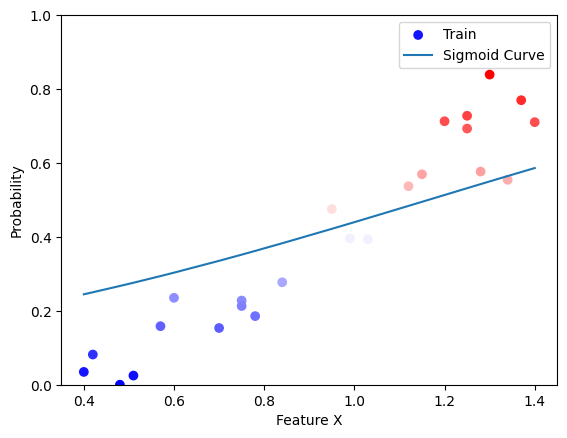

In [ ]:
# plotting a Linear curve to fit training data
LogReg.plot_graph(x_train,y_train)

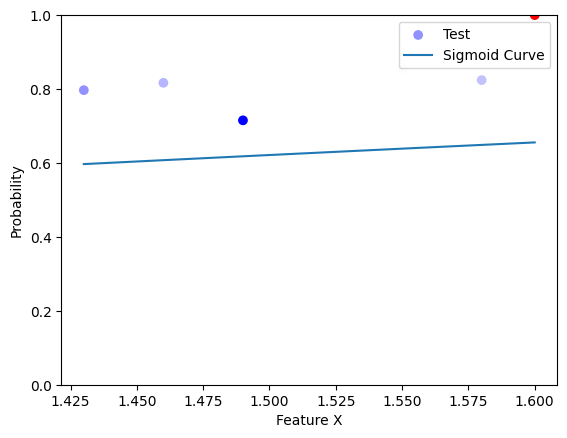

In [ ]:
# plotting a linear line on test data
LogReg.plot_graph(x_test,y_test,"Test")

In [ ]:
#done